## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

(50000, 32, 32, 3)


In [4]:
print(x_train.shape)

(50000, 3072)


In [15]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    #inputs = keras.layers.Input(shape = (x_train.shape[-1] , ))
    inputs = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units = 256 , activation = 'relu')(inputs)
    x = keras.layers.Dense(units = 256 , activation = 'relu')(x)
    x = keras.layers.Dense(units = 256 , activation = 'relu')(x)
    x = keras.layers.Dense(units = 256 , activation = 'relu')(x)
    out = keras.layers.Dense(units = 10 , activation = 'softmax')(x)
    model = keras.models.Model(inputs = [inputs] , outputs = [out])
    return model

model = build_mlp()

In [16]:
"""
Compile 模型
"""
opt = keras.optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy' , optimizer = opt , metrics = ['acc'])

In [17]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x = x_train , y = y_train, 
          epochs= 20, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 22us/step - loss: 1.9046 - acc: 0.3027 - val_loss: 1.7490 - val_acc: 0.3600
Epoch 2/20
50000/50000 [==============================] - 1s 20us/step - loss: 1.6969 - acc: 0.3907 - val_loss: 1.6393 - val_acc: 0.4206
Epoch 3/20
50000/50000 [==============================] - 1s 20us/step - loss: 1.6087 - acc: 0.4241 - val_loss: 1.5726 - val_acc: 0.4422
Epoch 4/20
50000/50000 [==============================] - 1s 20us/step - loss: 1.5354 - acc: 0.4494 - val_loss: 1.5504 - val_acc: 0.4514
Epoch 5/20
50000/50000 [==============================] - 1s 19us/step - loss: 1.4843 - acc: 0.4690 - val_loss: 1.5607 - val_acc: 0.4421
Epoch 6/20
50000/50000 [==============================] - 1s 19us/step - loss: 1.4478 - acc: 0.4817 - val_loss: 1.4749 - val_acc: 0.4766
Epoch 7/20
50000/50000 [==============================] - 1s 20us/step - loss: 1.4133 - acc: 0.4929 - val_loss: 1.4593 - val_acc

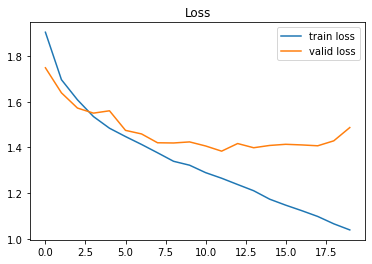

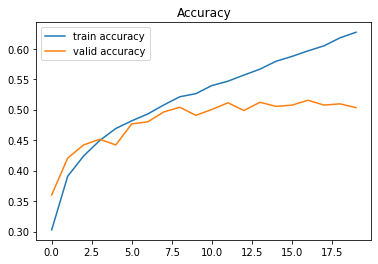

In [18]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()